In [12]:
# Python
import pandas as pd
from prophet import Prophet



In [13]:
import pickle

In [547]:
import seaborn as sns
import matplotlib.pyplot as plt


In [548]:
# Set the display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [541]:
def dbprophet(homeid):
    df = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/updated_hourly_csv/hourly_{homeid}.csv')
    df.time = pd.to_datetime(df.time).dt.to_period('h')
    df.index = df.time 
    df_electric = df[['time', 'electric-combined']]
    df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
    df_electric.ds = df_electric.ds.dt.to_timestamp()
    df_electric_test = df_electric.iloc[-336:]
    df_electric = df_electric.iloc[:len(df) -336]

    #instantiate model
    # Python
    m = Prophet()
    m.fit(df_electric)
    future = m.make_future_dataframe(periods=24*7, freq='H')
    forecast = m.predict(future)
    forecast_pred = forecast.iloc[-336:]
    forecast_merge_actual = forecast_pred.merge(df_electric_test, on = 'ds')
    
    fig, ax = plt.subplots(1,1, figsize = (15,9))
    sns.lineplot(data=forecast_merge_actual, x= 'ds', y='yhat', ax=ax, label='y_pred')
    sns.lineplot(data = forecast_merge_actual, x ='ds', y= 'y', ax=ax, label= 'y_act')
    plt.suptitle(f'1 week prediction v real for house {homeid}')

    fig2 = m.plot_components(forecast)





    
    

In [608]:
def dbprophet_all():
    df = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data.csv')
    df.time = pd.to_datetime(df.time).dt.to_period('h')
    df.index = df.time 
    df_electric = df[['time', 'electric-combined', 'temperature_2m (°C)']]
    df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
    print(df_electric.head())
    df_electric.ds = df_electric.ds.dt.to_timestamp()
    df_electric_test = df_electric.iloc[-336:]
    df_electric = df_electric.iloc[:len(df) -336]
    print(df_electric.head())
    df_electric = df_electric.loc[~df_electric.index.duplicated(keep='first')]
    m = Prophet()
    m.fit(df_electric)
    future = m.make_future_dataframe(periods=24*7, freq='H')
    print(f'length of future: {len(future)}')
    forecast = m.predict(future)
   
    forecast_pred = forecast.iloc[-336:]
    forecast_merge_actual = forecast_pred.merge(df_electric_test, on = 'ds')
    
    fig, ax = plt.subplots(1,1, figsize = (30,9))
    sns.lineplot(data= df_electric, x='ds', y= 'y', ax =ax, label= 'historic')
    sns.lineplot(data=forecast_merge_actual, x= 'ds', y='yhat', ax=ax, label='y_pred')
    sns.lineplot(data = forecast_merge_actual, x ='ds', y= 'y', ax=ax, label= 'y_act')
    plt.suptitle(f'1 week prediction v real for community')

    fig2 = m.plot_components(forecast)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_23732/2868435632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_23732/2868435632.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.ds = df_electric.ds.dt.to_timestamp()
16:44:24 - cmdstanpy - INFO - Chain [1] start processing
16:44:24 - cmdstanpy - INFO - Chain [1] done processing
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-

                                ds        y  temperature_2m (°C)
time                                                            
2017-09-01 02:00  2017-09-01 02:00  3227.63             9.730612
2017-09-01 03:00  2017-09-01 03:00  3123.89             9.325510
2017-09-01 04:00  2017-09-01 04:00  4279.22             9.043878
2017-09-01 05:00  2017-09-01 05:00  3795.89             9.509184
2017-09-01 06:00  2017-09-01 06:00  7504.94            10.109184
                                  ds        y  temperature_2m (°C)
time                                                              
2017-09-01 02:00 2017-09-01 02:00:00  3227.63             9.730612
2017-09-01 03:00 2017-09-01 03:00:00  3123.89             9.325510
2017-09-01 04:00 2017-09-01 04:00:00  4279.22             9.043878
2017-09-01 05:00 2017-09-01 05:00:00  3795.89             9.509184
2017-09-01 06:00 2017-09-01 06:00:00  7504.94            10.109184
length of future: 3509


/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: F

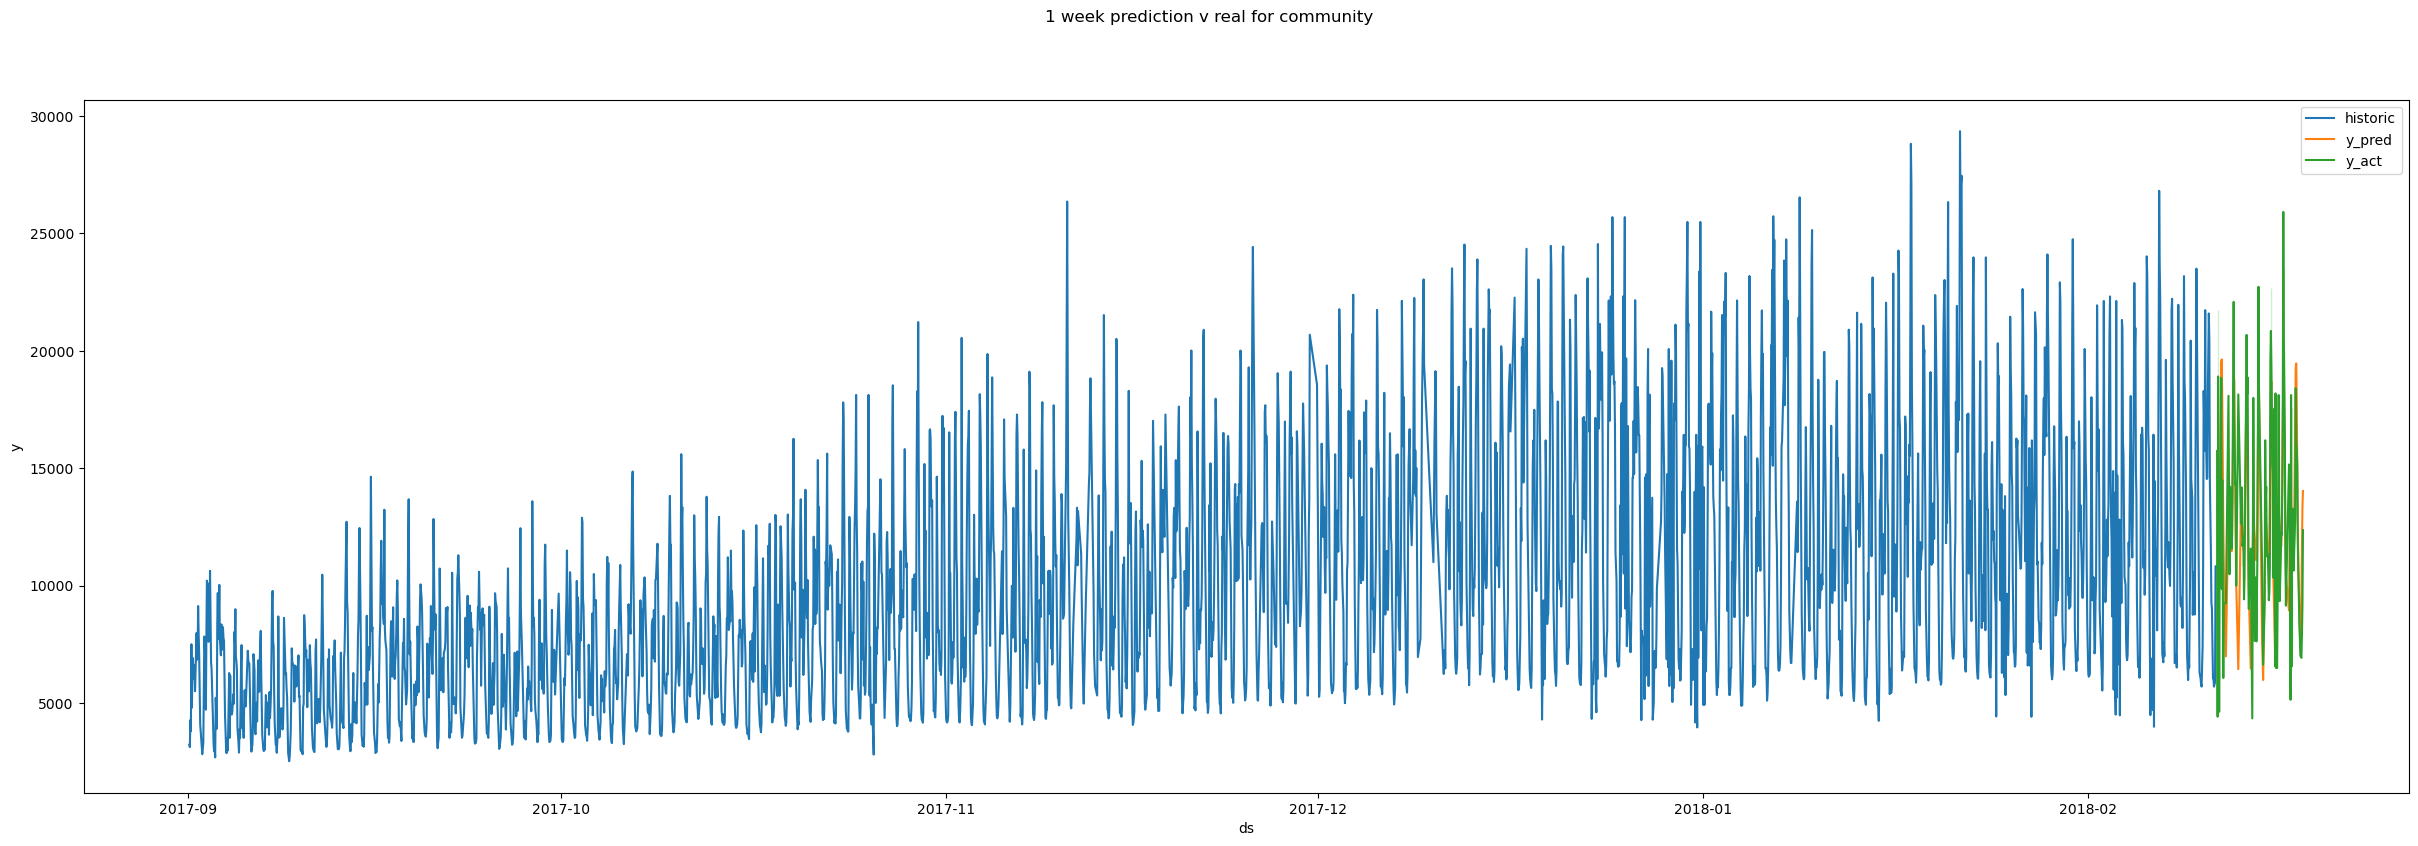

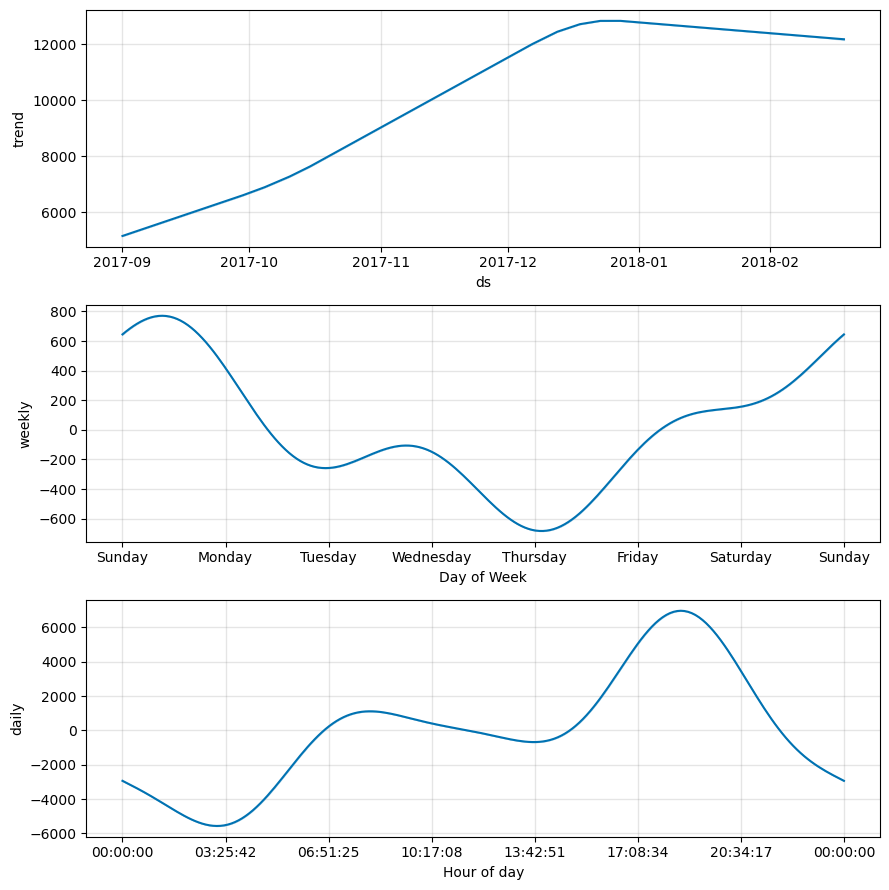

In [609]:
dbprophet_all()

In [542]:
def dbprophet3H(homeid):
    df = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/3h_csv/hourly_{homeid}.csv')
    df.time = pd.to_datetime(df.time).dt.to_period('3H')
    df.index = df.time 
    df_electric = df[['time', 'electric-combined']]
    df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
    df_electric.ds = df_electric.ds.dt.to_timestamp()
    df_electric_test = df_electric.iloc[-96:]
    df_electric = df_electric.iloc[:len(df) -96]
    m = Prophet()
    m.fit(df_electric)
    future = m.make_future_dataframe(periods=96, freq='3H')
    forecast = m.predict(future)
    forecast_pred = forecast.iloc[-96:]
    forecast_merge_actual = forecast_pred.merge(df_electric_test, on = 'ds')
    
    fig, ax = plt.subplots(1,1, figsize = (15,9))
    sns.lineplot(data=forecast_merge_actual, x= 'ds', y='yhat', ax=ax, label='y_pred')
    sns.lineplot(data = forecast_merge_actual, x ='ds', y= 'y', ax=ax, label= 'y_act')
    plt.suptitle(f'1 week prediction v real for house {homeid}')




    
    

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_23732/1411602493.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.time = pd.to_datetime(df.time).dt.to_period('3H')
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_23732/1411602493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_23732/1411602493.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

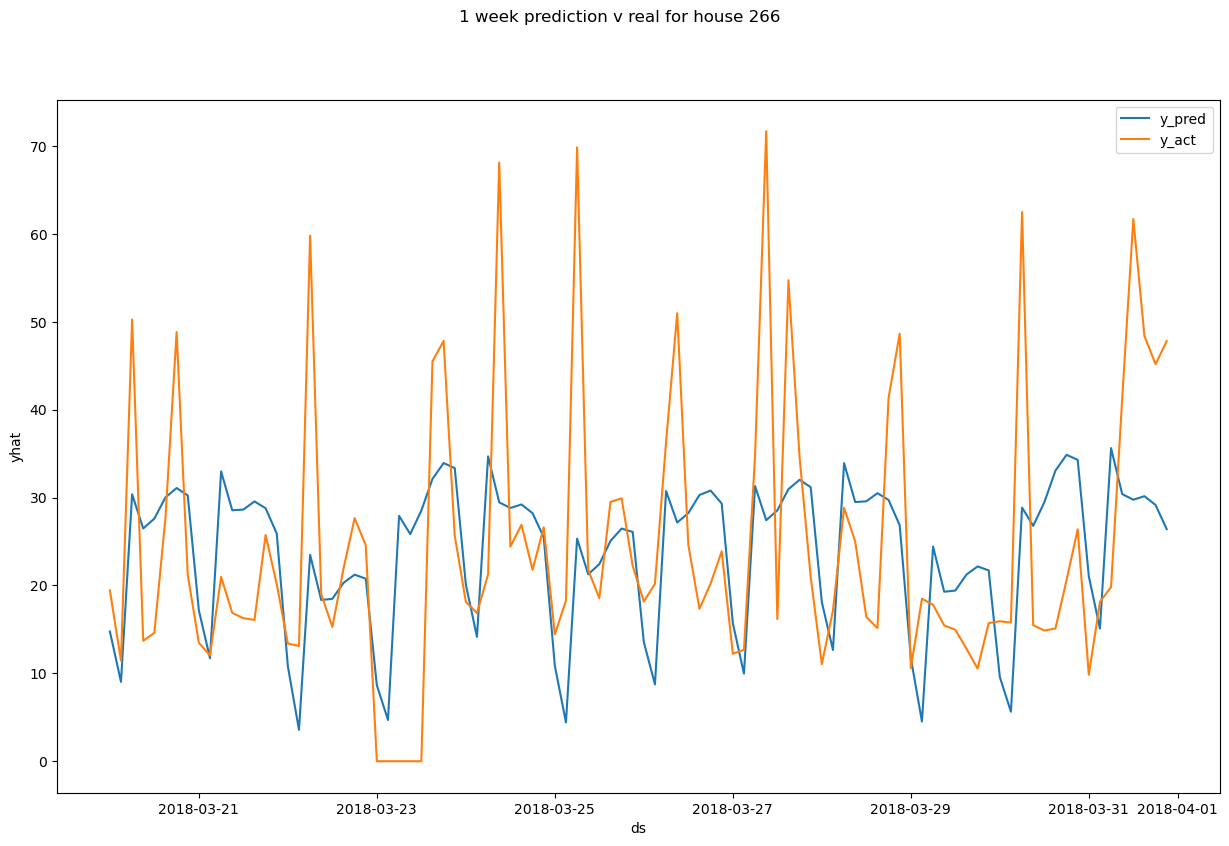

In [543]:
dbprophet3H(266)

In [544]:
dbprophet(300)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/barry/CodeAcademy/Ideal_dataset/updated_hourly_csv/hourly_300.csv'

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_23732/755906945.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_23732/755906945.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.ds = df_electric.ds.dt.to_timestamp()
13:07:48 - cmdstanpy - INFO - Chain [1] start processing
13:07:49 - cmdstanpy - INFO - Chain [1] done processing
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-pa

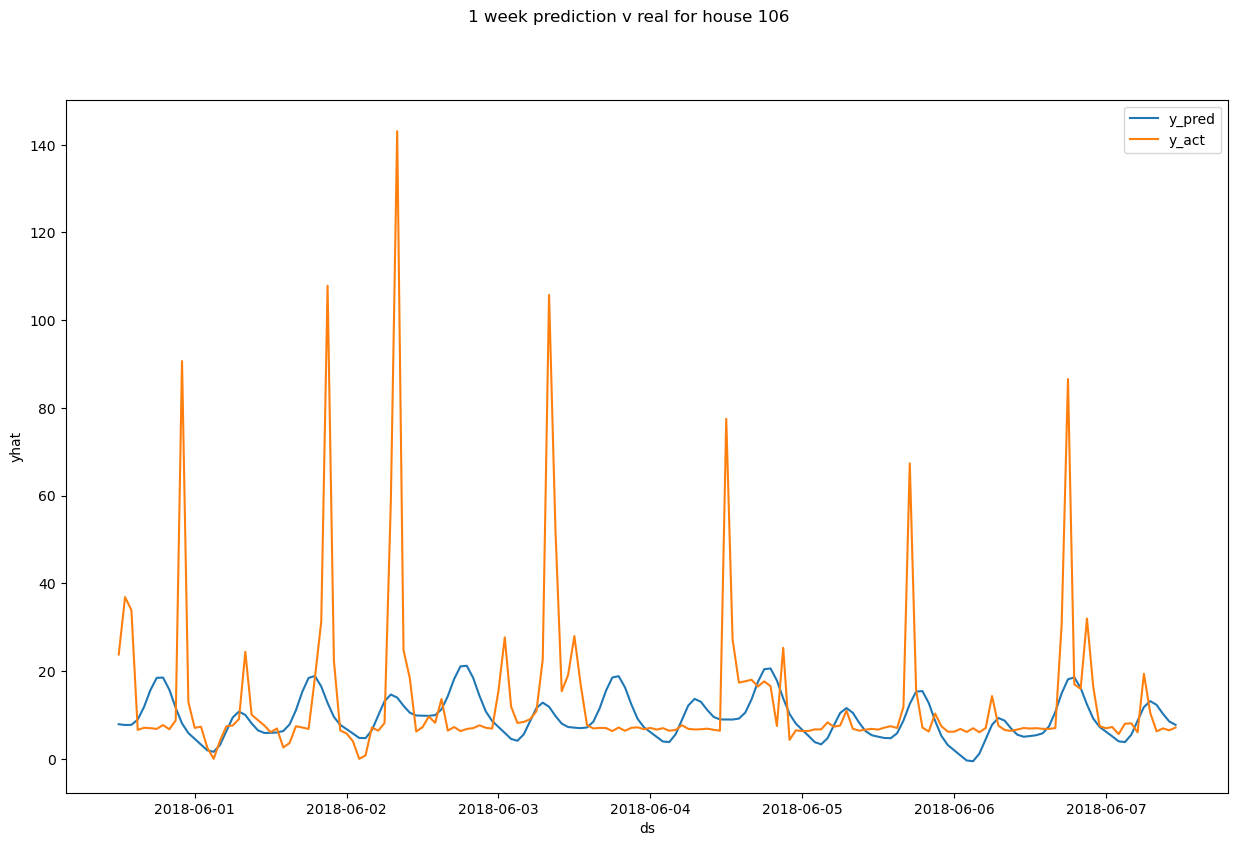

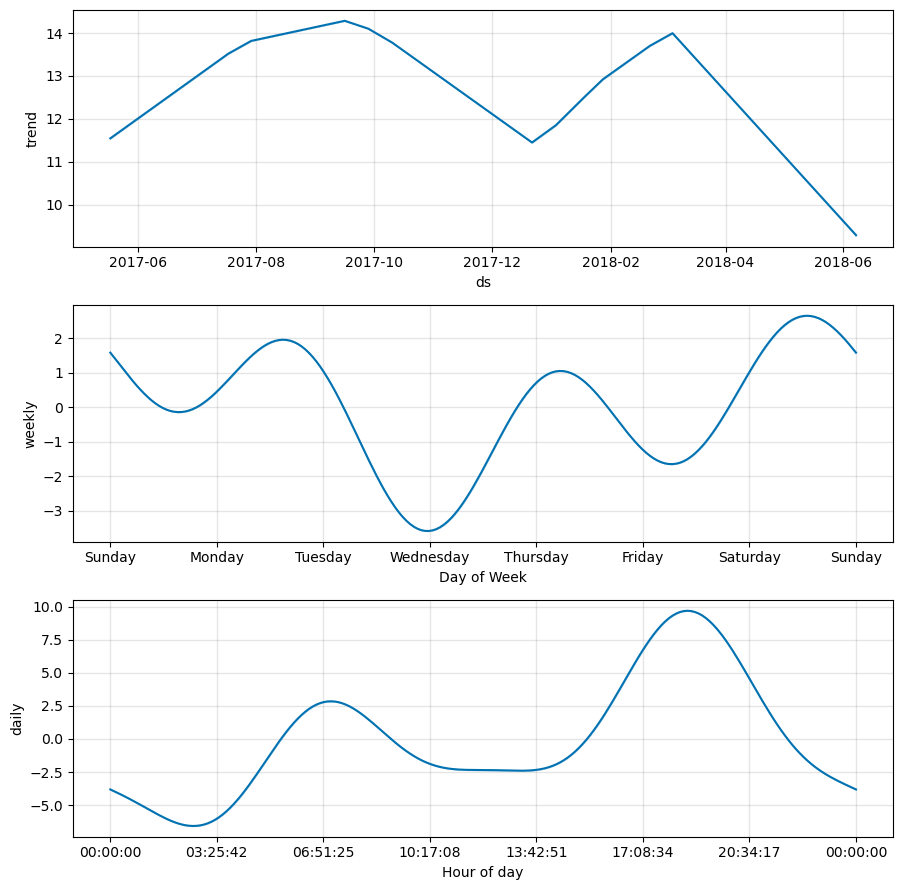

In [ ]:
dbprophet(106)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_23732/755906945.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_23732/755906945.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.ds = df_electric.ds.dt.to_timestamp()
13:08:02 - cmdstanpy - INFO - Chain [1] start processing
13:08:03 - cmdstanpy - INFO - Chain [1] done processing
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-pa

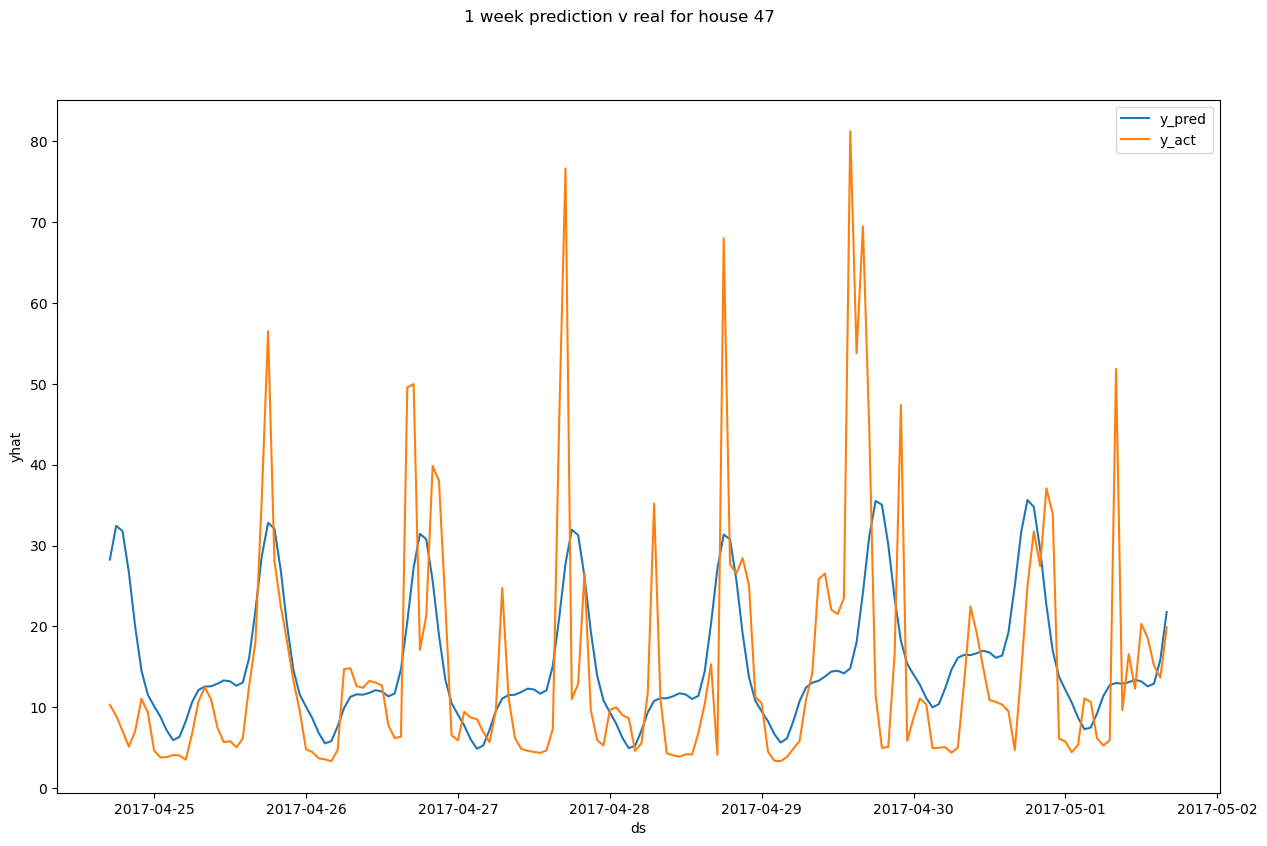

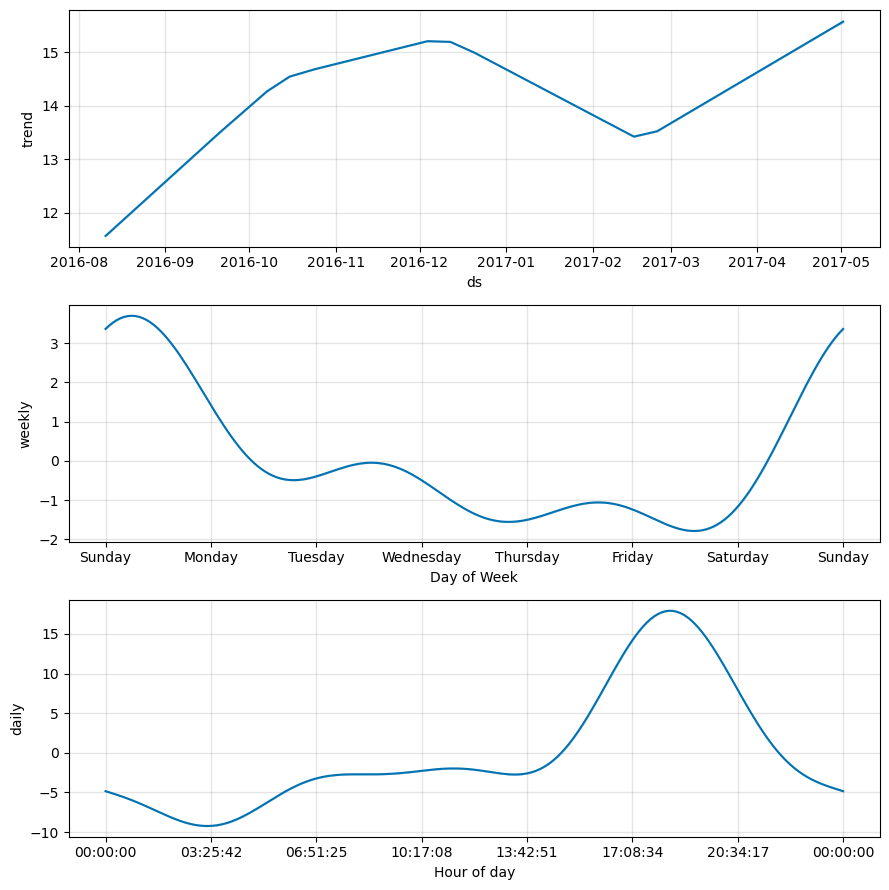

In [ ]:
dbprophet(47)


In [ ]:
#df = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/updated_hourly_csv/hourly_106.csv')

In [ ]:
df = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/combined_houses_1H')

In [ ]:
df_test = df.iloc[-168:]

In [ ]:
df= df.iloc[:len(df) -168]

In [ ]:
df.time = pd.to_datetime(df.time).dt.to_period('h')

In [ ]:
df.index = df.time

In [ ]:
df_electric = pd.DataFrame(df['electric-combined'])

In [ ]:
df_electric = df_electric.reset_index()

In [ ]:
df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)

In [ ]:
df_electric.ds = df_electric.ds.dt.to_timestamp()

In [ ]:
df_electric_test = df_electric.iloc[-168:]

In [ ]:
df_electric = df_electric.iloc[:len(df) -168]

In [ ]:
df_electric.tail()


,ds,y
9084,2018-05-31 07:00:00,221419.0
9085,2018-05-31 08:00:00,52290.0
9086,2018-05-31 09:00:00,115009.0
9087,2018-05-31 10:00:00,86450.0
9088,2018-05-31 11:00:00,89868.0


In [ ]:
# Python
m = Prophet()
m.fit(df_electric)

10:08:01 - cmdstanpy - INFO - Chain [1] start processing
10:08:01 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=24*7, freq='H')


/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/prophet/forecaster.py:1803: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


In [ ]:
forecast = m.predict(future)
display(forecast.head())
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-17 19:00:00,41855.298055,-6032.502655,156885.585833,41855.298055,41855.298055,33338.712655,33338.712655,33338.712655,33842.293349,33842.293349,33842.293349,-503.580694,-503.580694,-503.580694,0.0,0.0,0.0,75194.010710
1,2017-05-17 20:00:00,41859.838356,-15562.038259,149175.992235,41859.838356,41859.838356,24654.176937,24654.176937,24654.176937,24421.582732,24421.582732,24421.582732,232.594205,232.594205,232.594205,0.0,0.0,0.0,66514.015293
2,2017-05-17 21:00:00,41864.378657,-25729.085247,138978.393045,41864.378657,41864.378657,11090.042483,11090.042483,11090.042483,10175.130048,10175.130048,10175.130048,914.912434,914.912434,914.912434,0.0,0.0,0.0,52954.421140
3,2017-05-17 22:00:00,41868.918958,-38702.054692,129423.896361,41868.918958,41868.918958,-568.385364,-568.385364,-568.385364,-2104.808390,-2104.808390,-2104.808390,1536.423026,1536.423026,1536.423026,0.0,0.0,0.0,41300.533594
4,2017-05-17 23:00:00,41873.459259,-48146.235329,112898.712257,41873.459259,41873.459259,-7357.721674,-7357.721674,-7357.721674,-9448.704693,-9448.704693,-9448.704693,2090.983019,2090.983019,2090.983019,0.0,0.0,0.0,34515.737585


,ds,yhat,yhat_lower,yhat_upper
9252,2018-06-07 07:00:00,47777.818817,-36319.614915,126666.349474
9253,2018-06-07 08:00:00,44708.302073,-35169.761457,120465.636368
9254,2018-06-07 09:00:00,37392.782935,-48736.671456,118715.245264
9255,2018-06-07 10:00:00,31113.608284,-56016.037553,119076.052025
9256,2018-06-07 11:00:00,28290.840557,-47031.543197,109718.593314


In [ ]:
df_electric.head()

,ds,y
0,2017-05-17 19:00:00,21684.0
1,2017-05-17 20:00:00,24725.0
2,2017-05-17 21:00:00,23257.0
3,2017-05-17 22:00:00,22844.0
4,2017-05-17 23:00:00,62672.0


In [ ]:
forecast_pred = forecast.iloc[-168:]


In [ ]:
df_electric_test.ds.head()

9089   2018-05-31 12:00:00
9090   2018-05-31 13:00:00
9091   2018-05-31 14:00:00
9092   2018-05-31 15:00:00
9093   2018-05-31 16:00:00
Name: ds, dtype: datetime64[ns]

In [ ]:
forecast_merge_actual = forecast_pred.merge(df_electric_test, on = 'ds')

In [ ]:
display(forecast_merge_actual[['ds','yhat', 'y']].head())

,ds,yhat,y
0,2018-05-31 12:00:00,28761.237967,85661.0
1,2018-05-31 13:00:00,28106.371232,132793.0
2,2018-05-31 14:00:00,28251.620901,121963.0
3,2018-05-31 15:00:00,32522.506903,23802.0
4,2018-05-31 16:00:00,42958.690592,25499.0


/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: F

<Axes: xlabel='ds', ylabel='yhat'>

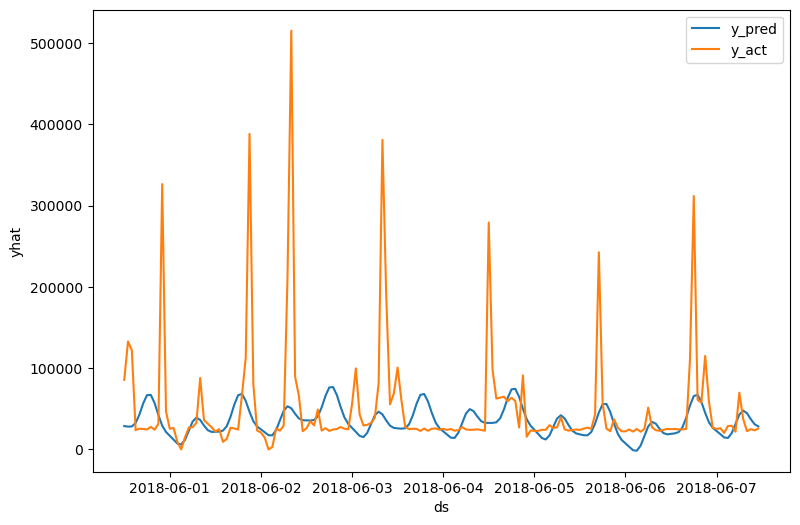

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (9,6))
sns.lineplot(data=forecast_merge_actual, x= 'ds', y='yhat', ax=ax, label='y_pred')
sns.lineplot(data = forecast_merge_actual, x ='ds', y= 'y', ax=ax, label= 'y_act')

/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


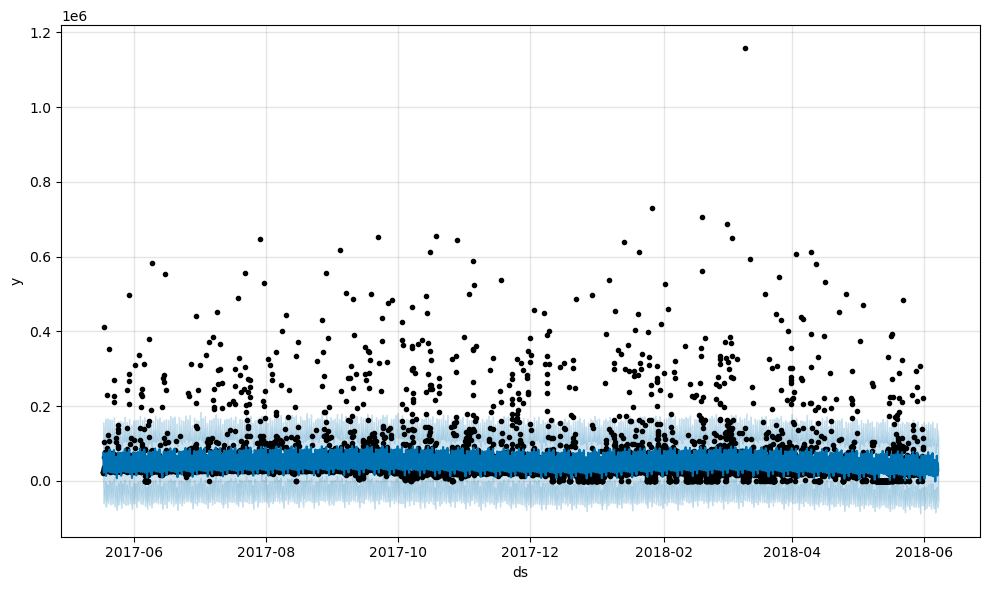

In [ ]:
# Python
fig1 = m.plot(forecast)



/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/prophet/plot.py:395: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/prophet/plot.py:399: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will retur

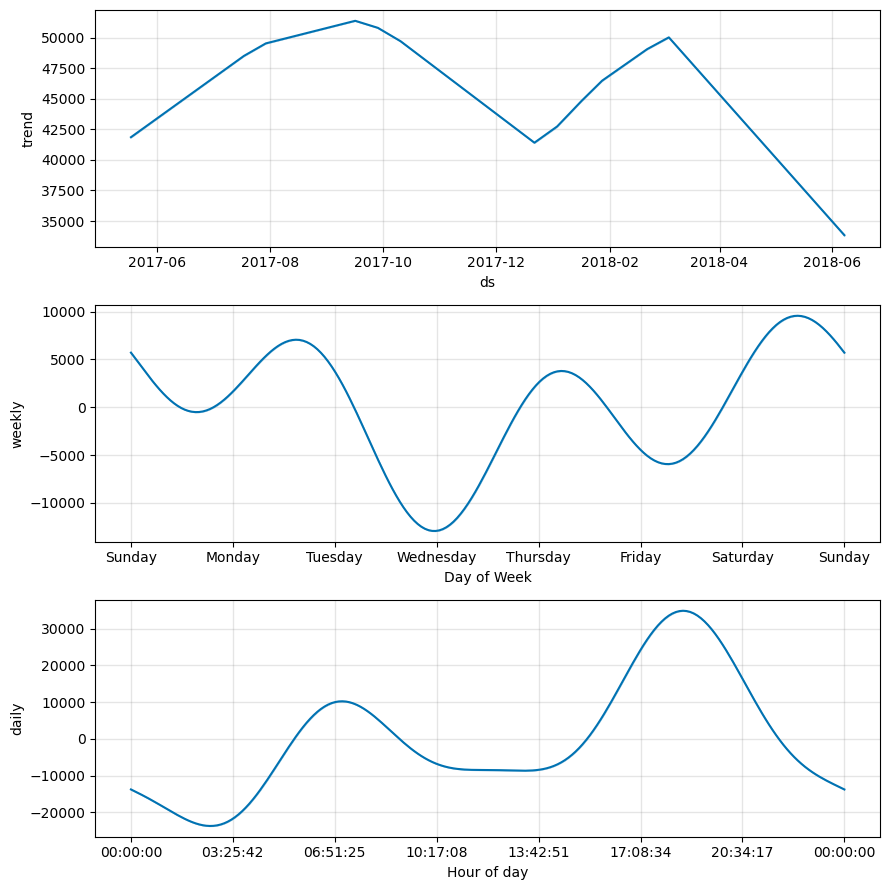

In [ ]:
# Python
fig2 = m.plot_components(forecast)

In [1]:

def dbprophet_all_pickle():
    df = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data.csv')
    df.time = pd.to_datetime(df.time).dt.to_period('h')
    df.index = df.time 
    df_electric = df[['time', 'electric-combined']]
    df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
    print(df_electric.head())
    df_electric.ds = df_electric.ds.dt.to_timestamp()
    df_electric = df_electric.loc[~df_electric.index.duplicated(keep='first')]
    m = Prophet()
    m.fit(df_electric)
    with open('/Users/barry/CodeAcademy/Ideal_dataset/coding/models/model.pkl', 'wb') as f:
        pickle.dump(m, f)
    

In [15]:
print(pd.__version__)

2.0.3


In [20]:
import cmdstanpy
from prophet import Prophet
import pkg_resources

cmdstanpy_version = cmdstanpy.__version__
prophet_version = pkg_resources.get_distribution("prophet").version

print(f"cmdstanpy version: {cmdstanpy_version}")
print(f"prophet version: {prophet_version}")

cmdstanpy version: 1.1.0
prophet version: 1.1.4


In [5]:
dbprophet_all_pickle()

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_6855/3889723278.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_6855/3889723278.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.ds = df_electric.ds.dt.to_timestamp()
18:11:02 - cmdstanpy - INFO - Chain [1] start processing


                                ds        y
time                                       
2017-09-01 02:00  2017-09-01 02:00  3227.63
2017-09-01 03:00  2017-09-01 03:00  3123.89
2017-09-01 04:00  2017-09-01 04:00  4279.22
2017-09-01 05:00  2017-09-01 05:00  3795.89
2017-09-01 06:00  2017-09-01 06:00  7504.94


18:11:02 - cmdstanpy - INFO - Chain [1] done processing
